<a href="https://www.kaggle.com/code/lalit7881/chest-x-ray-pneumonia-detection-rf-100?scriptVersionId=293483051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-x-ray-pneumonia-numerical-feature-dataset/val_features.csv
/kaggle/input/chest-x-ray-pneumonia-numerical-feature-dataset/train_features.csv
/kaggle/input/chest-x-ray-pneumonia-numerical-feature-dataset/test_features.csv


## Title:
Chest X-Ray Pneumonia: Numerical Feature Analysis Dataset

##  Description:
This dataset contains extracted numerical features from chest X-ray images designed for the detection and analysis of pneumonia using machine learning techniques. Instead of raw image pixels, the dataset focuses on quantitatively derived features such as intensity statistics, texture measures, shape descriptors, and frequency-based attributes that capture key radiographic patterns associated with healthy lungs and pneumonia-affected lungs.

The dataset is well-suited for classification, feature importance analysis, and model benchmarking, enabling efficient experimentation without the computational overhead of deep image processing. It supports both binary classification (Normal vs Pneumonia) and extended analytical tasks such as feature correlation, dimensionality reduction, and model comparison.

This structured numerical format makes the dataset ideal for traditional ML algorithms like Logistic Regression, Random Forest, SVM, KNN, and ensemble methods, while also being useful for hybrid approaches combining classical ML with deep learning pipelines.

Key Use Cases:

Pneumonia detection using numerical ML features

Medical image feature engineering research

Model accuracy and performance comparison

Explainable AI (XAI) in healthcare diagnostics

Educational and benchmarking purposes in medical ML

## Import dataset

In [2]:
train_path = "/kaggle/input/chest-x-ray-pneumonia-numerical-feature-dataset/train_features.csv"
val_path   = "/kaggle/input/chest-x-ray-pneumonia-numerical-feature-dataset/val_features.csv"
test_path  = "/kaggle/input/chest-x-ray-pneumonia-numerical-feature-dataset/test_features.csv"


In [3]:
train_df = pd.read_csv(train_path)
val_df   = pd.read_csv(val_path)
test_df  = pd.read_csv(test_path)

In [4]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (5216, 31)
Validation shape: (16, 31)
Test shape: (624, 31)


In [5]:
train_df.head()

,mean,std,min,max,median,p10,p90,skewness,kurtosis,entropy,...,lbp_1,lbp_2,lbp_3,lbp_4,lbp_5,lbp_6,lbp_7,lbp_8,lbp_9,image
0,0.286990,0.149222,0.0,0.996078,0.247059,0.125490,0.533333,0.784317,-0.166128,7.043110,...,0.080826,0.051346,0.091446,0.138184,0.122513,0.074051,0.090607,0.123062,0.161270,NORMAL2-IM-0771-0001.jpeg
1,0.537788,0.261362,0.0,1.000000,0.564706,0.150980,0.862745,-0.390577,-0.708541,7.704054,...,0.074219,0.058502,0.095657,0.148499,0.113785,0.067627,0.074631,0.145401,0.144363,NORMAL2-IM-1294-0001-0002.jpeg
2,0.478816,0.228072,0.0,1.000000,0.537255,0.074510,0.725490,-0.739819,-0.366467,7.294026,...,0.068634,0.060135,0.101501,0.149643,0.115173,0.069199,0.072098,0.164261,0.132141,IM-0675-0001.jpeg
3,0.556725,0.219356,0.0,1.000000,0.592157,0.258824,0.800000,-0.917178,0.403122,7.364598,...,0.071854,0.057770,0.096863,0.149902,0.121277,0.067322,0.074951,0.144897,0.143036,NORMAL2-IM-1169-0001.jpeg
4,0.419866,0.231424,0.0,1.000000,0.482353,0.000000,0.670588,-0.671260,-0.759173,6.775589,...,0.073303,0.049850,0.077972,0.109695,0.093506,0.058914,0.073029,0.243942,0.144562,IM-0421-0001.jpeg


In [6]:
# Dataset info
train_df.info()

# Check missing values
train_df.isna().sum()

# Statistical summary
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean              5216 non-null   float64
 1   std               5216 non-null   float64
 2   min               5216 non-null   float64
 3   max               5216 non-null   float64
 4   median            5216 non-null   float64
 5   p10               5216 non-null   float64
 6   p90               5216 non-null   float64
 7   skewness          5216 non-null   float64
 8   kurtosis          5216 non-null   float64
 9   entropy           5216 non-null   float64
 10  glcm_contrast     5216 non-null   float64
 11  glcm_energy       5216 non-null   float64
 12  glcm_homogeneity  5216 non-null   float64
 13  glcm_correlation  5216 non-null   float64
 14  edge_density      5216 non-null   float64
 15  edge_count        5216 non-null   int64  
 16  edge_strength     5216 non-null   int64  


,mean,std,min,max,median,p10,p90,skewness,kurtosis,entropy,...,lbp_0,lbp_1,lbp_2,lbp_3,lbp_4,lbp_5,lbp_6,lbp_7,lbp_8,lbp_9
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,...,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,0.481919,0.222822,0.002022,0.987354,0.522075,0.123173,0.738254,-0.570828,-0.485375,7.276571,...,0.064370,0.072120,0.050957,0.092606,0.149574,0.131235,0.069181,0.077786,0.152830,0.139340
std,0.072694,0.037348,0.013414,0.048650,0.092902,0.106454,0.071116,0.407459,0.827220,0.229401,...,0.014912,0.008450,0.005955,0.008090,0.024250,0.024983,0.005761,0.008968,0.040249,0.020689
min,0.237626,0.079597,0.000000,0.596078,0.223529,0.000000,0.380392,-2.746581,-1.604120,5.989802,...,0.006042,0.042389,0.013184,0.044174,0.066193,0.066971,0.028503,0.048355,0.063187,0.060669
25%,0.438359,0.197766,0.000000,1.000000,0.470588,0.027451,0.701961,-0.772142,-0.952010,7.169503,...,0.055695,0.066635,0.047848,0.087933,0.136566,0.114700,0.065201,0.070938,0.122311,0.126644
50%,0.481361,0.224454,0.000000,1.000000,0.525490,0.109804,0.745098,-0.548320,-0.683596,7.321142,...,0.065269,0.071594,0.051712,0.093254,0.148933,0.124863,0.068787,0.077164,0.142113,0.137444
75%,0.526967,0.249546,0.000000,1.000000,0.580392,0.192157,0.780392,-0.339436,-0.291306,7.431732,...,0.073029,0.077106,0.054916,0.097946,0.160728,0.144047,0.072922,0.084732,0.176559,0.151237
max,0.868507,0.342862,0.301961,1.000000,0.886275,0.756863,0.972549,0.895781,9.225871,7.762136,...,0.123306,0.158539,0.065216,0.117294,0.313950,0.299484,0.090851,0.155548,0.389832,0.220993


In [7]:
# Dataset shape
print("Shape:", train_df.shape)

# Column names
print("\nColumns:")
print(train_df.columns)

# Data types
print("\nData Types:")
print(train_df.dtypes)

# Missing values (isnull)
print("\nMissing Values (isnull().sum()):")
print(train_df.isnull().sum())

# Duplicate rows
print("\nDuplicate Rows Count:")
print(train_df.duplicated().sum())

# Statistical summary
print("\nStatistical Summary:")
train_df.describe()

Shape: (5216, 31)

Columns:
Index(['mean', 'std', 'min', 'max', 'median', 'p10', 'p90', 'skewness',
       'kurtosis', 'entropy', 'glcm_contrast', 'glcm_energy',
       'glcm_homogeneity', 'glcm_correlation', 'edge_density', 'edge_count',
       'edge_strength', 'fft_mean', 'fft_std', 'fft_energy', 'lbp_0', 'lbp_1',
       'lbp_2', 'lbp_3', 'lbp_4', 'lbp_5', 'lbp_6', 'lbp_7', 'lbp_8', 'lbp_9',
       'image'],
      dtype='object')

Data Types:
mean                float64
std                 float64
min                 float64
max                 float64
median              float64
p10                 float64
p90                 float64
skewness            float64
kurtosis            float64
entropy             float64
glcm_contrast       float64
glcm_energy         float64
glcm_homogeneity    float64
glcm_correlation    float64
edge_density        float64
edge_count            int64
edge_strength         int64
fft_mean            float64
fft_std             float64
fft_energy         

,mean,std,min,max,median,p10,p90,skewness,kurtosis,entropy,...,lbp_0,lbp_1,lbp_2,lbp_3,lbp_4,lbp_5,lbp_6,lbp_7,lbp_8,lbp_9
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,...,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,0.481919,0.222822,0.002022,0.987354,0.522075,0.123173,0.738254,-0.570828,-0.485375,7.276571,...,0.064370,0.072120,0.050957,0.092606,0.149574,0.131235,0.069181,0.077786,0.152830,0.139340
std,0.072694,0.037348,0.013414,0.048650,0.092902,0.106454,0.071116,0.407459,0.827220,0.229401,...,0.014912,0.008450,0.005955,0.008090,0.024250,0.024983,0.005761,0.008968,0.040249,0.020689
min,0.237626,0.079597,0.000000,0.596078,0.223529,0.000000,0.380392,-2.746581,-1.604120,5.989802,...,0.006042,0.042389,0.013184,0.044174,0.066193,0.066971,0.028503,0.048355,0.063187,0.060669
25%,0.438359,0.197766,0.000000,1.000000,0.470588,0.027451,0.701961,-0.772142,-0.952010,7.169503,...,0.055695,0.066635,0.047848,0.087933,0.136566,0.114700,0.065201,0.070938,0.122311,0.126644
50%,0.481361,0.224454,0.000000,1.000000,0.525490,0.109804,0.745098,-0.548320,-0.683596,7.321142,...,0.065269,0.071594,0.051712,0.093254,0.148933,0.124863,0.068787,0.077164,0.142113,0.137444
75%,0.526967,0.249546,0.000000,1.000000,0.580392,0.192157,0.780392,-0.339436,-0.291306,7.431732,...,0.073029,0.077106,0.054916,0.097946,0.160728,0.144047,0.072922,0.084732,0.176559,0.151237
max,0.868507,0.342862,0.301961,1.000000,0.886275,0.756863,0.972549,0.895781,9.225871,7.762136,...,0.123306,0.158539,0.065216,0.117294,0.313950,0.299484,0.090851,0.155548,0.389832,0.220993


In [8]:
summary_df = pd.DataFrame({
    "Data Type": train_df.dtypes,
    "Missing Values": train_df.isnull().sum(),
    "Duplicate Rows": train_df.duplicated().sum()
})

summary_df


,Data Type,Missing Values,Duplicate Rows
mean,float64,0,0
std,float64,0,0
min,float64,0,0
max,float64,0,0
median,float64,0,0
p10,float64,0,0
p90,float64,0,0
skewness,float64,0,0
kurtosis,float64,0,0
entropy,float64,0,0


In [9]:
num_df = train_df.drop(columns=['image'])

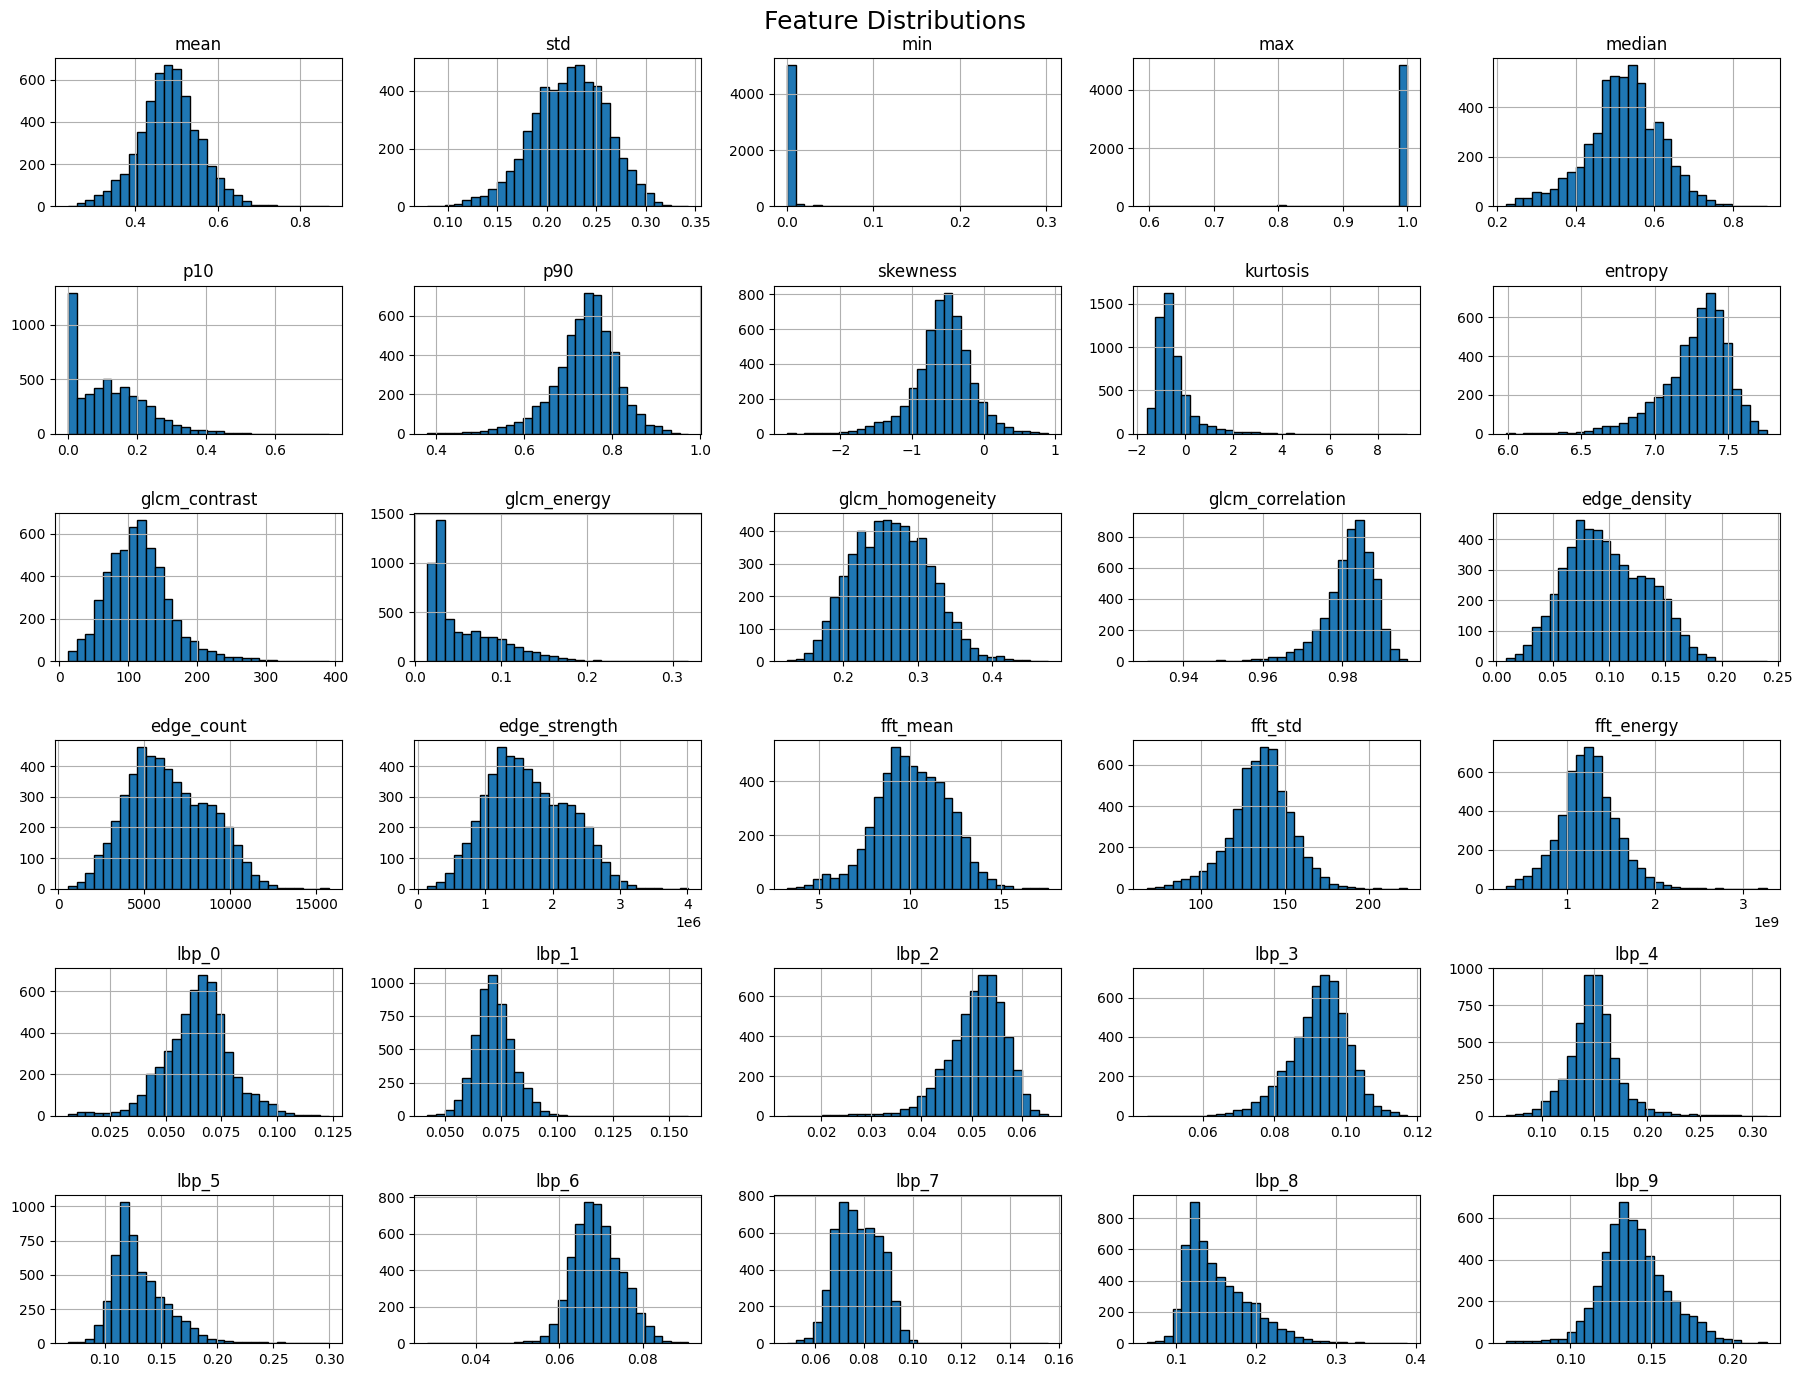

In [10]:
num_df.hist(
    figsize=(18, 14),
    bins=30,
    edgecolor='black'
)
plt.suptitle("Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()


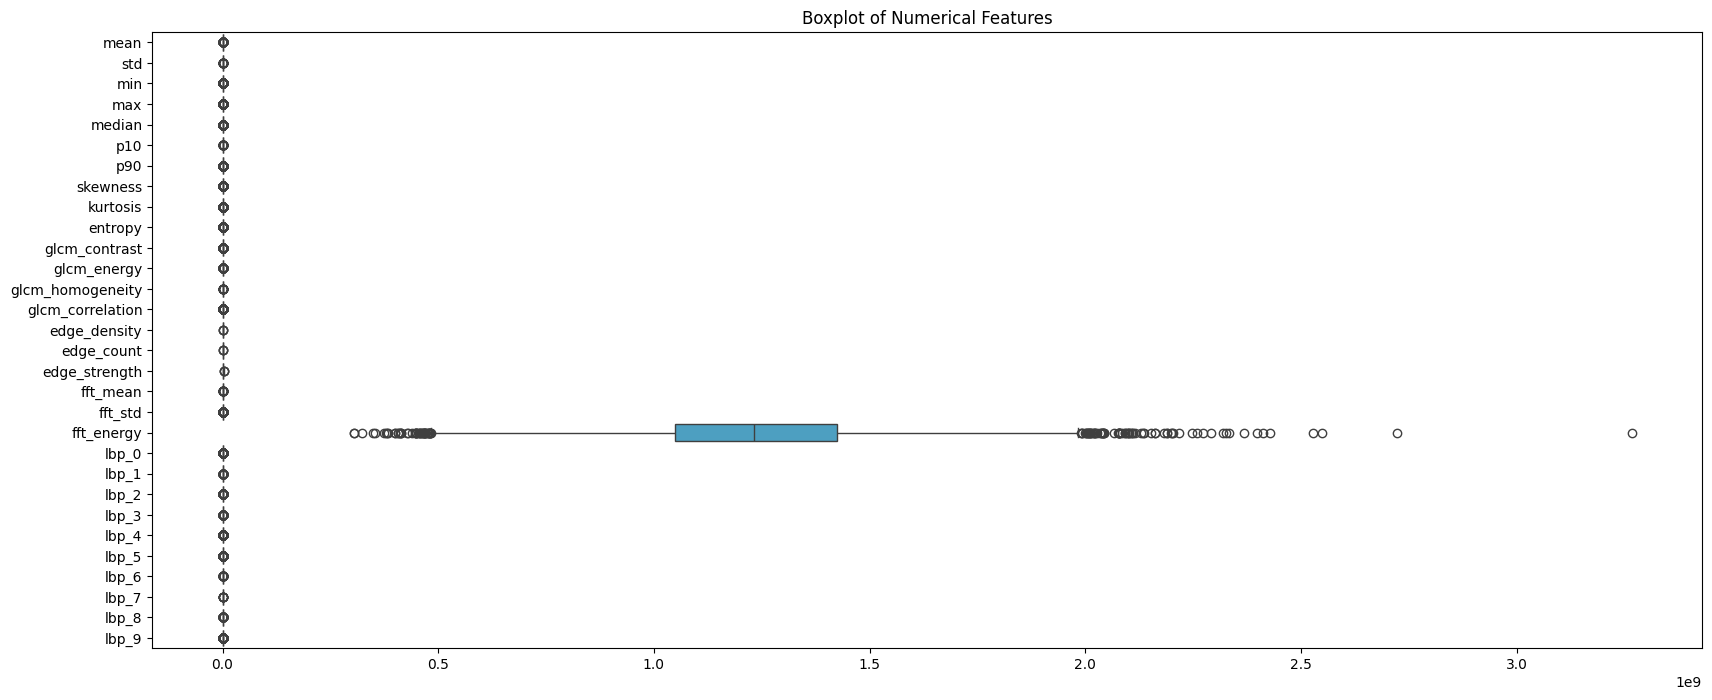

In [11]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=num_df, orient='h')
plt.title("Boxplot of Numerical Features")
plt.show()


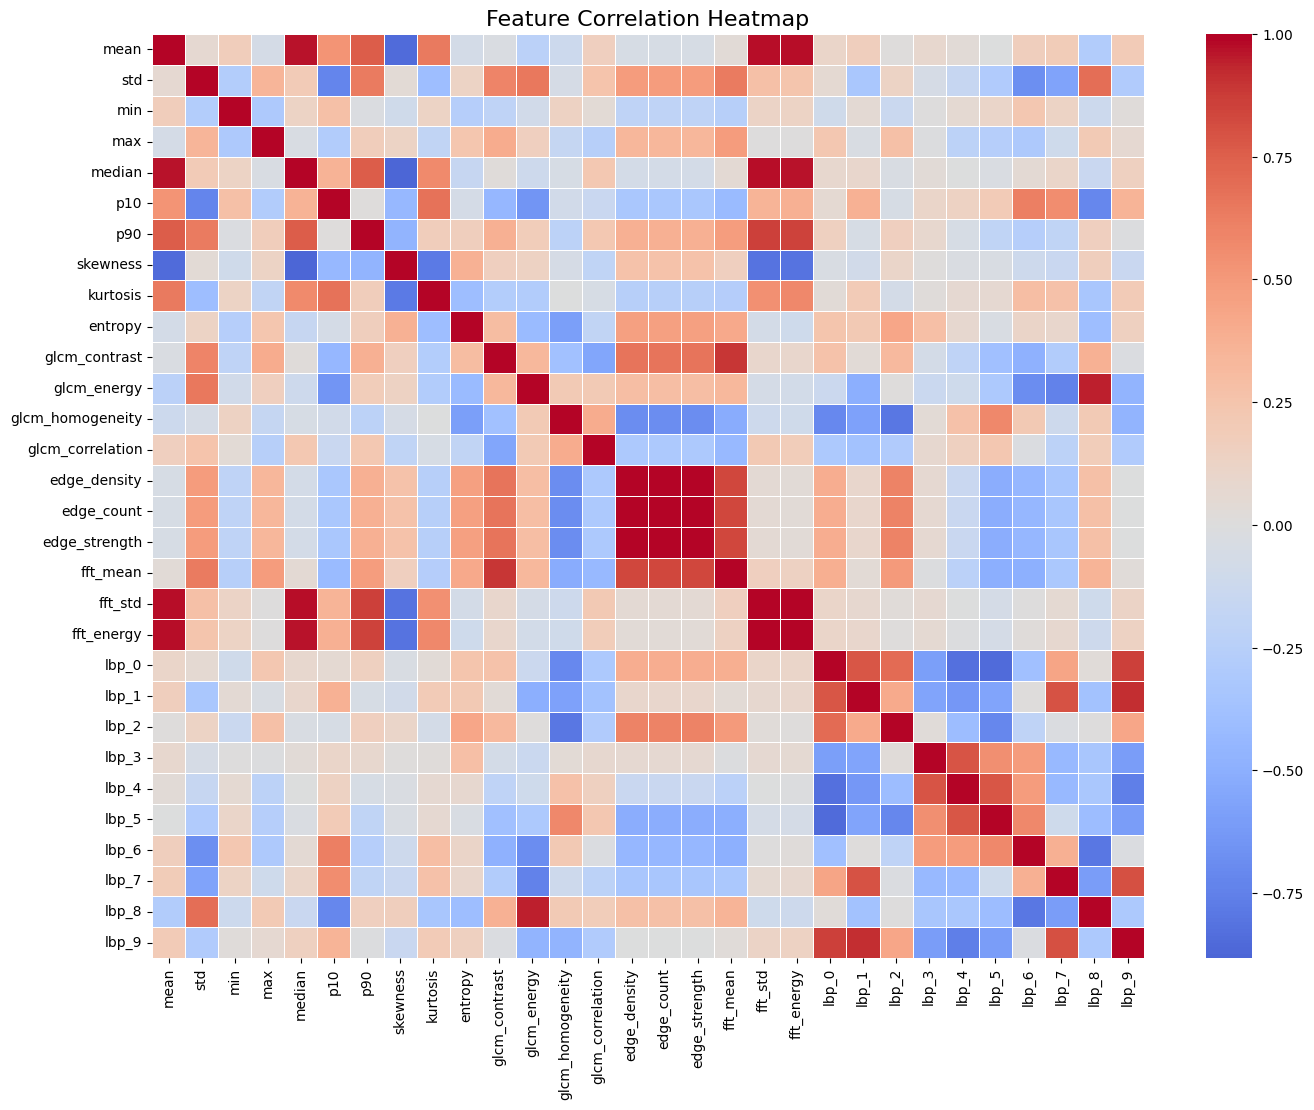

In [12]:
plt.figure(figsize=(16, 12))
corr = num_df.corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


In [13]:
corr_pairs = (
    corr.abs()
        .unstack()
        .sort_values(ascending=False)
)

# Remove self-correlation
corr_pairs = corr_pairs[corr_pairs < 1]

corr_pairs.head(10)


fft_std     fft_energy    0.994267
fft_energy  fft_std       0.994267
fft_std     mean          0.976327
mean        fft_std       0.976327
            fft_energy    0.976027
fft_energy  mean          0.976027
fft_std     median        0.973538
median      fft_std       0.973538
fft_energy  median        0.968114
median      fft_energy    0.968114
dtype: float64

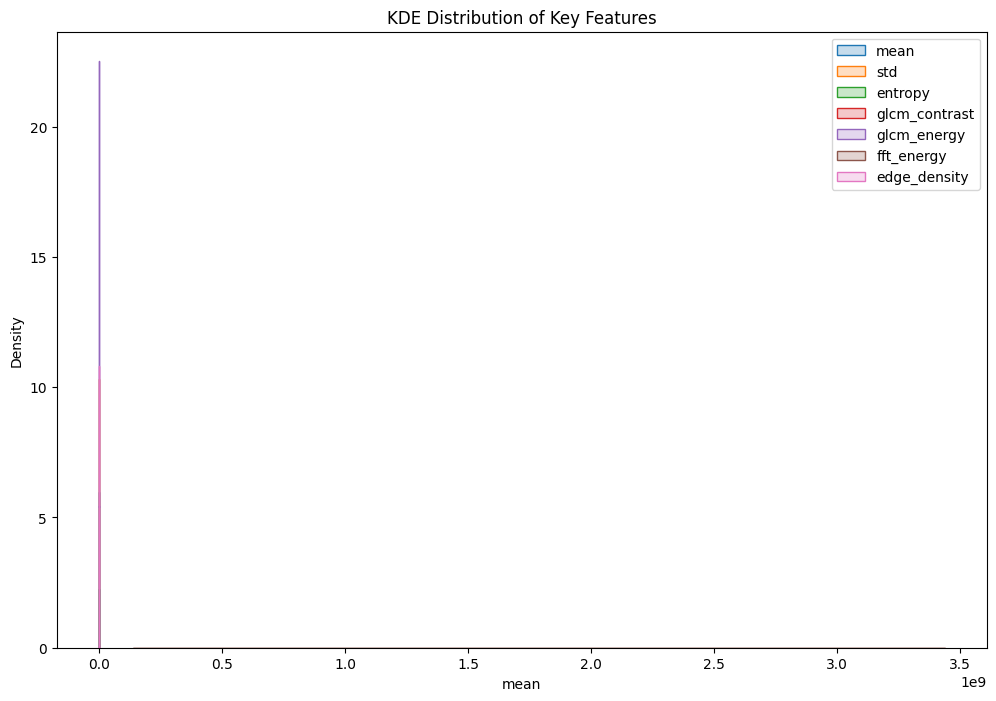

In [14]:
selected_features = [
    'mean', 'std', 'entropy',
    'glcm_contrast', 'glcm_energy',
    'fft_energy', 'edge_density'
]

plt.figure(figsize=(12, 8))
for col in selected_features:
    sns.kdeplot(num_df[col], label=col, fill=True)

plt.title("KDE Distribution of Key Features")
plt.legend()
plt.show()


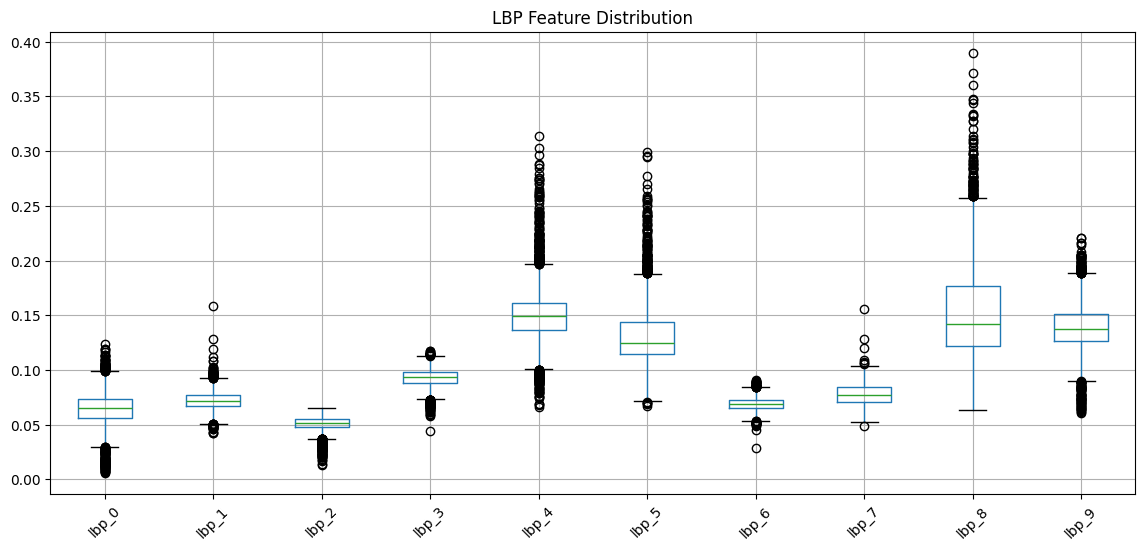

In [15]:
lbp_cols = [col for col in num_df.columns if col.startswith('lbp')]

plt.figure(figsize=(14, 6))
num_df[lbp_cols].boxplot()
plt.title("LBP Feature Distribution")
plt.xticks(rotation=45)
plt.show()


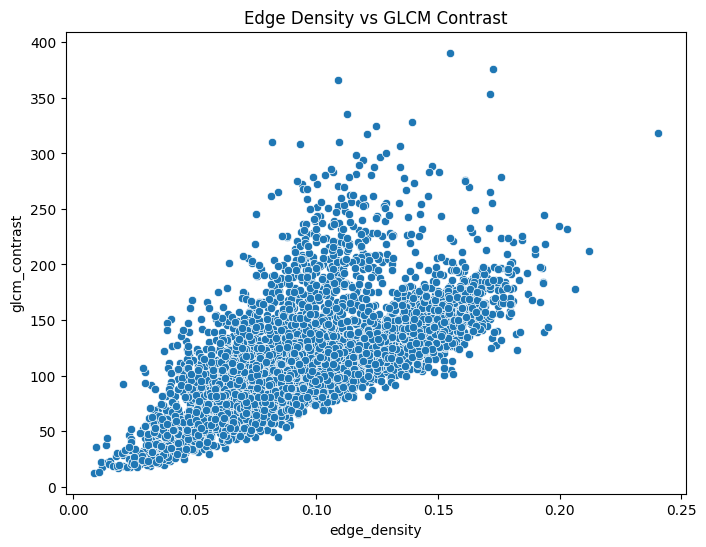

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=num_df['edge_density'],
    y=num_df['glcm_contrast']
)
plt.title("Edge Density vs GLCM Contrast")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [18]:
X = train_df.drop(columns=["image"])

In [19]:
threshold = X["entropy"].median()

y = np.where(X["entropy"] > threshold, 1, 0)


In [20]:
print("Label distribution (FULL DATA):")
print(pd.Series(y).value_counts())

Label distribution (FULL DATA):
0    2608
1    2608
Name: count, dtype: int64


In [21]:
if len(np.unique(y)) < 2:
    raise ValueError("Label creation failed: only one class generated.")


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [23]:
print("\nLabel distribution (TRAIN):")
print(pd.Series(y_train).value_counts())

print("\nLabel distribution (TEST):")
print(pd.Series(y_test).value_counts())


Label distribution (TRAIN):
1    2086
0    2086
Name: count, dtype: int64

Label distribution (TEST):
0    522
1    522
Name: count, dtype: int64


In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ),
    "SVM": SVC(kernel="rbf", probability=True),
    "Naive Bayes": GaussianNB()
}


In [27]:
results = []

for name, model in models.items():
    
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append((name, round(acc * 100, 2)))

In [28]:
results = []

for name, model in models.items():

    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    # append as DICTIONARY with exact column names
    results.append({
        "Model": name,
        "Accuracy (%)": round(acc * 100, 2)
    })

# convert to DataFrame
results_df = pd.DataFrame(results)

# sort by Accuracy (%)
results_df = results_df.sort_values(by="Accuracy (%)", ascending=False)

results_df


,Model,Accuracy (%)
3,Random Forest,100.00
2,Decision Tree,100.00
0,Logistic Regression,98.85
4,SVM,95.69
1,KNN,88.22
5,Naive Bayes,65.42


In [29]:
best_model = results_df.iloc[0]
print("Best Model:")
print(best_model)


Best Model:
Model           Random Forest
Accuracy (%)            100.0
Name: 3, dtype: object


## Thank you...pls upvote!!!